> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset: The TMDb Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

Introduction: I'll be exploring the TMDb movies dataset containing data on 10,000 movies including user ratings, genre,  budget and box office revenue. The columns in the table:


Questions for our analysis: is there a correlation between the popularity score and the production budget? Does the lead actor or director have an effect on the popularity score? which films were most popular in the last 20 years?

In [56]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

In [57]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [58]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df_tmdb = pd.read_csv(r"C:\Users\sjohn\anaconda3\envs\my_env\Investigate A Dataset\tmdb-movies.csv")
df_tmdb.head(2)
#df_tmdb.info()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Now I'm going to review the data's structure to note their datatypes and to examine the columns and the number of rows in each. Then I will look for missing data and get some summary statistics. I'll be using the .info(), .shape, and .describe() methods.

In [59]:
#data structure
df_tmdb.info()
#df_tmdb.shape
#df_tmdb.release_year.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The .info function and .shape gives me lots of information. I can see the column names, the row counts in each column and their datatypes. It also gives me a breakdown on the total number of each datatype(dtypes) and now we know how many numeric columns (10) and object columns(11) are present. The .shape method returns the dimensions of the dataframe, with 10866 rows and 21 columns. <p>It is apparent that some rows have missing data in columns so that will need to be addressed before exploratory data analysis can begin. Now that I have the datatypes and column names I can examine and decide whether to drop columns that may not be useful for our analysis. The numeric datatypes also vary so some might need to be converted before we work with them. Next I will get some statistics using .describe(), .max(), and .min().<p/> 


In [60]:
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<p>
    There's more problems with this dataset. Note the <strong>release_date</strong> column's datatype is "object", which in Pandas is just a pointer to a string datatype. This column should be a datetime object which will allow date operations to be performed on it. I can also easily discern that some of the columns have large values with leading or trailing zeros. We'll modify the number of decimal places in the columns and remove some trailing zeros in the values. But first I will convert the release_date column to a datetime object.</p>

In [61]:
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])

Next I will confirm the change was successful using the dtypes method.

In [62]:
df_tmdb.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

As expected, the change was successful. Now that the release_date column is a datetime object it is available for use in our analysis if needed. Now we want to return the min() and max() values to get ranges.

In [63]:
df_tmdb_max = df_tmdb.select_dtypes(include='number').max()
df_tmdb_min = df_tmdb.select_dtypes(include='number').min()
print("Max Value:\n","\n", df_tmdb_max, "\n")
print("Min Value:\n","\n", df_tmdb_min)

Max Value:
 
 id              4.178590e+05
popularity      3.298576e+01
budget          4.250000e+08
revenue         2.781506e+09
runtime         9.000000e+02
vote_count      9.767000e+03
vote_average    9.200000e+00
release_year    2.015000e+03
budget_adj      4.250000e+08
revenue_adj     2.827124e+09
dtype: float64 

Min Value:
 
 id                 5.000000
popularity         0.000065
budget             0.000000
revenue            0.000000
runtime            0.000000
vote_count        10.000000
vote_average       1.500000
release_year    1960.000000
budget_adj         0.000000
revenue_adj        0.000000
dtype: float64


As you can see above I have the range of values after finding the maximum and minimum numbers. However, notice the '0.0' in the five columns. This is a problem as it will skew any calculation results we may perform. Let's use numpy to change the zero values to np.nan (Not a Number), and then we'll follow up with .min() to see if the change was successful.  Next let's deal with the trailing zeros.

In [64]:
#df_tmdb.info()
#df_tmdb.round(decimals=0)

df_tmdb.revenue.replace(0, np.nan, inplace = True)
df_tmdb.revenue_adj.replace(0, np.nan, inplace = True)
df_tmdb.budget.replace(0, np.nan, inplace = True)
df_tmdb.runtime.replace(0, np.nan, inplace = True)
df_tmdb.budget_adj.replace(0, np.nan, inplace = True)
df_tmdb.popularity.replace(0, np.nan, inplace = True)


Before we check our minimum values, let's convert the floats to int.

In [65]:
df_tmdb_min.astype(int)

id                 5
popularity         0
budget             0
revenue            0
runtime            0
vote_count        10
vote_average       1
release_year    1960
budget_adj         0
revenue_adj        0
dtype: int32

Ok this worked; however, for simplicity I'm going to replace the popularity and budget_adj min values between 0 and 1.

In [66]:
df_tmdb.query('popularity < 1')

df_tmdb['popularity'].mask(df_tmdb['popularity'] < 1, 1, inplace=True)
df_tmdb['budget_adj'].mask(df_tmdb['budget_adj'] < 1, 1, inplace=True)


Success! Next, let's deal with the trailing zeros by convert the values < 1 to int.

In [67]:
df_tmdb_min.astype(int)

id                 5
popularity         0
budget             0
revenue            0
runtime            0
vote_count        10
vote_average       1
release_year    1960
budget_adj         0
revenue_adj        0
dtype: int32

Obtaining the number of unique values in each column might also be helpful for our analysis. Let's use the .nunique function to accomplish this.

In [68]:
df_tmdb.nunique()

id                      10865
imdb_id                 10855
popularity               1756
budget                    556
revenue                  4701
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   246
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2612
revenue_adj              4839
dtype: int64

Now we have the total number of unique values in the columns, here for our reference if needed.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning - Removing nulls and duplicate rows

After confirming rows with null values in the previous step, I'm going to remove them using the .dropna() function below. This makes the data more consistent and suitable for our data analysis.


In [69]:
df_tmdb.dropna(inplace=True)

Next I'll confirm that the nulls have been removed using the .isnull(), .sum(), and .any() methods. This returns a Boolean value, expected to be False indicating the rows have been removed.

In [70]:
df_tmdb.isnull().sum().any()

False

As expected the previous statement returned False. The last step in this data cleaning operation is to confirm if any duplicate rows exist using the .duplicated() function. Then we'll use sum() to return the total number of duplicate rows.

In [71]:
print(df_tmdb.duplicated().sum())

0


The the previous operation returned 0 meaning it did not find any duplicates, so this worked.

After reviewing the data further I'm going to drop some columns that are not useful for our analysis. This should make the dataframe easier to work with.

In [72]:
df_tmdb.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'runtime', 'keywords', 'production_companies'], axis=1, inplace=True)
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      1287 non-null   float64       
 1   budget          1287 non-null   float64       
 2   revenue         1287 non-null   float64       
 3   original_title  1287 non-null   object        
 4   cast            1287 non-null   object        
 5   director        1287 non-null   object        
 6   genres          1287 non-null   object        
 7   release_date    1287 non-null   datetime64[ns]
 8   vote_count      1287 non-null   int64         
 9   vote_average    1287 non-null   float64       
 10  release_year    1287 non-null   int64         
 11  budget_adj      1287 non-null   float64       
 12  revenue_adj     1287 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 140.8+ KB


That's better. Later in the analysis, since the 'director' column is one of our independent variables, I'm to focus my analysis on it. We'll split and explode the string values in the column which, in the case of multiple directors delimited by the "|" will return the first occurence in the string which is the most prominent director for the movie. I'm going to save the results to a new dataframe.

In [73]:
#create new dataframe
df_director = df_tmdb.assign(director=df_tmdb.director.str.split("|")).explode('director')
df_director

,popularity,budget,revenue,original_title,cast,director,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10595,1.549139,7000000.0,1.617778e+08,Live and Let Die,Roger Moore|Yaphet Kotto|Jane Seymour|Clifton ...,Guy Hamilton,Adventure|Action|Thriller,1973-07-05,293,6.1,1973,3.437812e+07,7.945168e+08
10689,1.910465,11000000.0,1.411957e+08,Thunderball,Sean Connery|Claudine Auger|Adolfo Celi|Lucian...,Terence Young,Adventure|Action|Thriller,2065-12-16,331,6.3,1965,7.612620e+07,9.771535e+08
10724,1.778746,7000000.0,8.197449e+07,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,Peter R. Hunt,Adventure|Action|Thriller,2069-12-12,258,6.4,1969,4.160985e+07,4.872780e+08
10759,1.198849,300000.0,7.000000e+07,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,John Carpenter,Horror|Thriller,1978-10-25,522,7.3,1978,1.002810e+06,2.339890e+08


Now we have our directors.

For the purposes of our analyses we now have a clean dataset we can work with. Next, we'll examine the data further using visualizations to look for trends or other correlating factors.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Is there a correlation between the film's production budget and the popularity score?

Let's examine the [budget_adj] column which is our independent variable in this question. I'm going to use panda's hist and plot functions and matplotlib to produce some histograms and other visualizations. First, let's see what the data looks like with a simple histogram.

<AxesSubplot:>

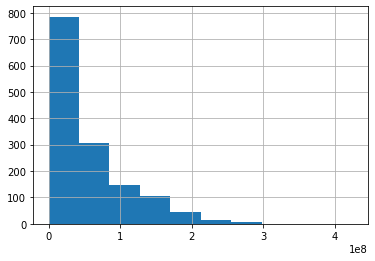

In [74]:
df_director.budget_adj.hist()

It appears the data is skewed to the right in the distribution for the budget_adj column. Let's see how strong or weak the correlation is between the popularity and budget_adj columns. We'lkl produce a scatter plot for this.

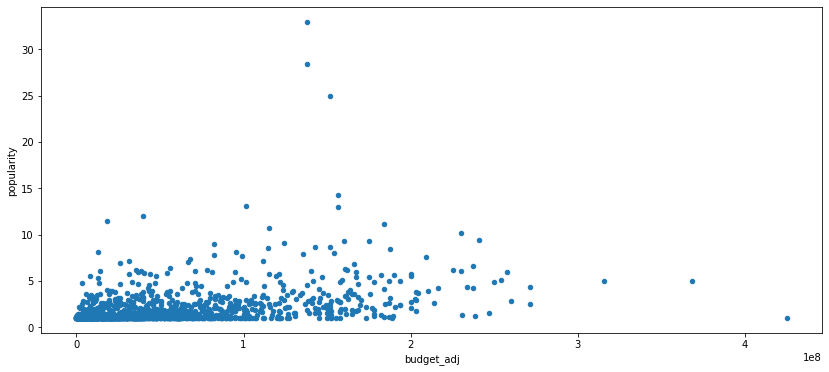

In [75]:
df_tmdb.plot(x='budget_adj', y='popularity', kind='scatter',figsize=[14, 6]);

It appears that there is a weak positive correlation between the two variables. Let's do another one using popularity and revenue_adj.

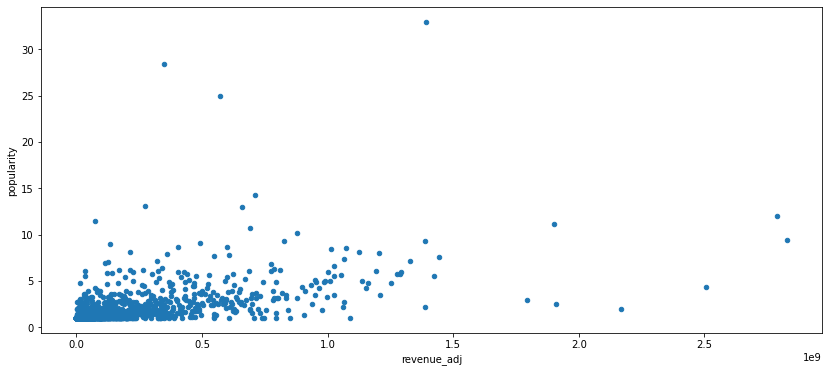

In [76]:
df_tmdb.plot(x='revenue_adj', y='popularity', kind='scatter',figsize=[14, 6]);


Like the last plot, the revenue_adj and popularity columns have a weak positive correlation.

### Research Question 2: Is the popularity score influenced by the director of the film? 

Now we'll narrow down our list of directors whose movies generated the most revenue adjusted for inflation. First we'll aggregate our list of directors and return the top ten with the most revenue.

In [92]:
#using groupby()
df_director = df_tmdb.groupby('director')['revenue_adj'].sum().nlargest(10)

#check the original dataframe
df_tmdb[df_tmdb['director'].isin(df_directors.index)].copy()

#check for unique values
df_director.unique()


array([9.62337154e+09, 6.36454529e+09, 5.74913581e+09, 5.51823337e+09,
       4.17745526e+09, 4.02640982e+09, 3.39058057e+09, 3.26154743e+09,
       3.17448434e+09, 3.06799328e+09])

In [93]:
df_director

director
Steven Spielberg     9.623372e+09
Peter Jackson        6.364545e+09
George Lucas         5.749136e+09
James Cameron        5.518233e+09
David Yates          4.177455e+09
Christopher Nolan    4.026410e+09
Sam Raimi            3.390581e+09
Gore Verbinski       3.261547e+09
Michael Bay          3.174484e+09
Francis Lawrence     3.067993e+09
Name: revenue_adj, dtype: float64

In [94]:
#top ten directors whose adjusted revenue is higher than the mean
df_topten = df_director.query(f'revenue_adj > {df_director["revenue_adj"].mean()}')

AttributeError: 'Series' object has no attribute 'query'

In [ ]:
#plots and histograms

#df_directors.plot(kind='bar', figsize=(12, 7))
